Vincent Earl Andrews
<h3 align="center">Machine Learning: Homework 1</h3>


In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing
from scipy.special import jv  # jv = bessel functions
import matplotlib.pyplot as plt


1. Ridge regression is a modified version of linear regression that penelizes the coefficients for being large. It accomplishes this by adding a so-called $L^2$ penalty term to the loss function (e.g. mean squared error): $L(\theta)=\frac{1}{n}\sum\limits_{i=1}^n \left(\hat{f}(x_i)-y_i\right)^2 + \lambda\sum\limits_{i=1}^d \theta_i^2$

a) Write each part of $L(\theta)$ in matrix-vector form where $\hat{f}$ is a LBF expansion regression model. Define each matrix and vector separately by writing their elements with subscripts, and state their dimensions. cdv dots

We can rewrite the first term as $ ||X\theta - y||^{2} = (X\theta - y)^{T}(X\theta - y)$ and the second term as $ \lambda ||\theta||^{2} = \lambda \theta^T \theta $, where $\lambda$ is a hyperparameter, $ \theta$ is a matrix, $\theta$ and y are vectors, and 'T" indicate sthe transpose of a matrix. <br>

If we take a set of data, we can load the data into a matrix X with a column of 1's added for convenience when multiplying the matrices. We exclude the result that we want to predict and place this data in a column vector, y. Here, $\theta$ is a column vector we need to solve for in order to minimize the loss function, $L(\theta)$.

Writing out these matrices and vectors with their  corresponding elements:

\begin{align*}
X &= \begin{bmatrix}
    1 & x_{11} & x_{12} & \cdots & x_{1d}       \\
    1 & x_{21} & x_{22} & \cdots & x_{2d}       \\
    \vdots & \vdots & \vdots & \ddots  & \vdots \\
    1 & x_{n1} & x_{n2} & \cdots & x_{nd} 
    \end{bmatrix}  &    
y &= \begin{bmatrix}
    y_{1} \\
    y_{2} \\
    y_{3} \\
    \vdots \\
    y_{n}
\end{bmatrix} &
\theta &= \begin{bmatrix}
    \theta_{1} \\
    \theta_{2} \\
    \theta_{3} \\
    \vdots \\
    \theta_{n}
\end{bmatrix}
\end{align*}
Matrix X has a shape of (n , d), vector y has a shape of n, and vector $\theta$ has a shape of d. Therefore, the order of multiplying maters in order to make sure our final result is a scalar for the loss function. 


Writing out the loss function in terms of matrices and vectors, we get:

\begin{align}
    L(\theta) = ((X \theta)^{T} - y^{T})(X \theta - y)) + \lambda \theta^{T} \theta \\
\end{align}

\begin{align}
       L(\theta) = (X\theta)^{T} X \theta - (X\theta)^{T} y - y^{T} X\theta + y^{T}y + \lambda \theta^{T} \theta
\end{align}

y and $\theta$ both have the same shape of a column of length n; therefore, we can rewrite $(X\theta)^{T}y = y^{T}X\theta$ and substitute this into the previous expression:

\begin{align}
       L(\theta) = (X\theta)^{T} X \theta - (X\theta)^{T}y - (X\theta)^{T}y + y^{T}y + \lambda \theta^{T} \theta \\
       L(\theta) = (X\theta)^{T} X \theta - 2(X\theta)^{T}y+ y^{T}y + \lambda \theta^{T} \theta \\
\end{align}

From the property $ (AB)^{T} = B^{T}A^{T}$, we can simplify the expression:


<div style="border: 2px solid purple; padding: 5px; width: 50%; margin: 0 auto; ">
\begin{align}
       L(\theta) = \theta^{T}X^{T} X \theta - 2(X\theta)^{T}y + y^{T}y + \lambda \theta^{T} \theta
\end{align}
</div>

Where matrix X has a shape of (n,d), vector $\theta$ is a column vector of shape n, and y is a column vector of shape d. 


b) Solve the following optimization problem by hand for the loss function $L$ above $\min\limits_{\theta\in\mathbb{R}^{d+1}} L(\theta)$

Using the loss function found in Part a, we can minimize the loss function by taking the gradient and setting the function equal to zero. Solving for $\theta$ here will give us value of theta that optimizes the loss function (minimize loss).

First, rewriting the $\theta$ vectors to make them easier to take derivatives for:

\begin{align}
    L(\theta) = X^{T}X||\theta||^{2} - 2(X\theta)^{T}y + y^{T}y + \lambda ||\theta||^{2}
\end{align}

Taking the derivatives with respect to $\theta$ in order to minimize the function for the smallest $\theta$ vector possible.
\begin{align}
    \nabla L(\theta) = 2X^{T}X\theta - 2X^{T}y + 2\lambda \theta 
\end{align}

Setting equal to zero to solve for $\theta$
\begin{align}
    X^{T}X\theta - X^{T}y + \lambda \theta = 0 \\
    X^{T}y = X^{T}X\theta + \lambda \theta \\
    X^{T}y = \theta \left(X^{T}X + \lambda\right) \\
\end{align}

Multiplying by the inverse of $\left(X^{T}X + \lambda\right)$ to cancel the terms on the rightside and solve for $\theta$. We also need to multiply $\lambda$ by the identity matrix in order to make sure the dimensions work out:
\begin{align}
     \left(X^{T}X + \lambda I\right)^{-1} X^{T}y = \theta \left(X^{T}X + \lambda\right)\left(X^{T}X + \lambda I\right)^{-1}
\end{align}

Therefore, we get $\theta$ equal to the following expression where $\theta$ is a column vector of length n:
<div style="border: 2px solid purple; padding: 5px; width: 50%; margin: 0 auto; ">
\begin{align}
    \theta = \left(X^{T}X + \lambda I\right)^{-1} X^{T}y
\end{align}
</div>

c) Write a Python class for this ridge LBF expansion regression model with a `fit` function applying the formula from part (b) to compute the parameters $\theta$ and a `predict` function to make predictions for input data after the model has been fit.

This class takes some training data (x, y) and performs a linear basis function expansion on the data. In this case, Bessel functions are used as an example to transfrom X into a new matrix $X_h$. The class then fits the data and predicts the resulting y data for the original dataset. 

In [5]:
import numpy as np
from scipy.special import jv  # Bessel function from SciPy

def LBF_Bessel(X, orders):
    # Ensure that X is a numpy array
    X = np.array(X)

    Xh = np.zeros_like(X, dtype=float)

    # Perform linear basis expansion using Bessel functions
    for o in orders:
        basis_function = jv(o, X)  # Bessel function of order o
        Xh += basis_function
    return Xh

class RidgeRegression:
        
    # fit the model to the data
    def fit(self, X, y, lam):
        # save the training data
        self.data = np.hstack((np.ones([X.shape[0],1]), X))
        
        # save the training labels
        self.outputs = y
        
        # find the beta values that minimize the sum of squared errors
        X = self.data
        self.theta = np.linalg.inv(X.T @ X + lam * np.identity(4)) @ X.T @ y
                
    # predict the output from input (testing) data
    def predict(self, X):
        
        # append a column of ones at the beginning of X
        X = np.hstack((np.ones([X.shape[0],1]), X))
        
        # return the outputs
        return X @ self.theta
    
# Example usage:
# Assuming X is a 2D matrix, and you want to use Bessel functions of orders 0, 1, and 2
X = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
y = np.array([[3],
              [5],
              [7]])
orders = [0, 1, 2]

# get transformation
X_h = LBF_Bessel(X, orders)
print("\nTransformed Matrix Xh:")
print(X_h)

# turn into array
X_h = X_h.astype(float)
X_h = preprocessing.normalize(X_h)

# Split data into training, validation, and test set
xtrain, xi, ytrain, yi = train_test_split(X_h, y, test_size = 0.4, random_state = 69)
xvald, xtest, yvald, ytest = train_test_split(xi, yi, test_size = 0.5, random_state = 69)  

# perform Ridge on training dataset
model = RidgeRegression()
model.fit(xtrain, ytrain, 1e-3)  # fit function 
results = model.predict(xvald) # predict function

# calculate mean absolute error of prices
MAE = mean_absolute_error(yvald, results)
print("the absolute error of the Ridge Regression model is = ", MAE)


Transformed Matrix Xh:
[[ 1.32015176  1.15344962  0.56509826]
 [-0.09906499 -0.45861079 -0.36891181]
 [-0.00602077  0.29329543  0.29982552]]
the absolute error of the Ridge Regression model is =  2.761168749602515


2. Use the details about houses in a real estate dataset and attempt to predict the list price for the houses. Use the [Mount Pleasant Real Estate dataset](https://www.hawkeslearning.com/Statistics/dis/datasets.html).

a) Read the dataset into Python and preprocess data excluding the "Misc Exterior" and "Amenities" columns into an appropriate data matrix for regression analysis. Randomly split the data into a training set, validation set, and test set at 60\%/20\%/20\%.

In [6]:
# open and clean data
df = pd.read_csv(r"C:\Users\vince\Downloads\Mount_Pleasant_Real_Estate_Data.csv")
df = df.drop(columns = ["ID", "Misc Exterior", "Amenities"]) # drop columns mentioned
df = df.dropna() # drop NaN rows

# extract y column (price)
prices = df["List Price"].values
y = [(p.replace('$', '')).replace(',', '') for p in prices] # remove $
y = np.array(y) # convert list to array
y = y.astype(float)

# now drop prices from original dataframe since we have them in column y
df = df.drop(columns = ["List Price"])

# replace strings with numbers
df = pd.get_dummies(df, columns = ["Subdivision", "House Style",])
df.replace('No', 0, inplace = True)
df.replace('Yes', 1, inplace = True)

# turn into array
x = df.to_numpy()
x = x.astype(float)
x = preprocessing.normalize(x)

# Split data into training, validation, and test set
xtrain, xi, ytrain, yi = train_test_split(x, y, test_size = 0.4, random_state = 69)
xvald, xtest, yvald, ytest = train_test_split(xi, yi, test_size = 0.5, random_state = 69)

b) Fit the least squares hyperplane to the training set to predict house prices, and evaluate its fit on the validation set.

In [18]:
class OrdinaryLeastSquares:
        
    # fit the model to the data
    def fit(self, X, y):
        # save the training data
        self.data = np.hstack((np.ones([X.shape[0],1]), X))
        
        # save the training labels
        self.outputs = y
        
        # find the beta values that minimize the sum of squared errors
        X = self.data
        self.theta = np.linalg.inv(X.T @ X) @ X.T @ y
                
    # predict the output from input (testing) data
    def predict(self, X):
        
        # append a column of ones at the beginning of X
        X = np.hstack((np.ones([X.shape[0],1]), X))
        
        # return the outputs
        return X @ self.theta

# perform OLS on training dataset
model = OrdinaryLeastSquares()
model.fit(xtrain, ytrain)  # fit function 
OLS_results = model.predict(xvald) # predict function

# calculate mean absolute error of prices
MAE = mean_absolute_error(yvald, OLS_results)
print("the absolute error of the OLS model is = ",MAE)

the absolute error of the OLS model is =  111823.60146752182


c) Fit a ridge regression to the training set to predict house prices, and evaluate its fit on the validation set. Repeat this for several different values of $\lambda$.

In [23]:
class RidgeRegression:
        
    # fit the model to the data
    def fit(self, X, y, lam):
        # save the training data
        self.data = np.hstack((np.ones([X.shape[0],1]), X))
        
        # save the training labels
        self.outputs = y
        
        # find the beta values that minimize the sum of squared errors
        X = self.data
        self.theta = np.linalg.inv(X.T @ X + lam * np.identity(33)) @ X.T @ y
                
    # predict the output from input (testing) data
    def predict(self, X):
        
        # append a column of ones at the beginning of X
        X = np.hstack((np.ones([X.shape[0],1]), X))
        
        # return the outputs
        return X @ self.theta
    
# perform Ridge on training dataset
model = RidgeRegression()
model.fit(xtrain, ytrain, 1e-9)  # fit function 
RID_results = model.predict(xvald) # predict function

# calculate mean absolute error of prices
MAE = mean_absolute_error(yvald, RID_results)
print("the absolute error of the Ridge Regression model is = ", MAE)

the absolute error of the Ridge Regression model is =  78656.02366062086


d) Fit an LBF expansion of your choice to the training set to predict house prices, and evaluate its fit on the validation set. Repeat this for several different values of $\lambda$

Document all experiments and conclude which experiment works best based on an appropriate train/validation/test split. Report your best test-set MAE at the end of your submission.

Text(0, 0.5, 'MAE')

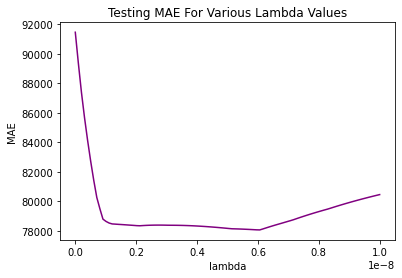

In [32]:
def LBF_Bessel(X):
    # Ensure that X is a numpy array
    X = np.array(X)
    max_order = X.shape[1] # max Bessel function order

    Xh = np.zeros_like(X, dtype=float)

    # Perform linear basis expansion using Bessel functions
    for o in range(max_order):
        basis_function = jv(o, X)  # Bessel function of order o
        Xh += basis_function
        
    return Xh

class RidgeRegression:
        
    # fit the model to the data
    def fit(self, X, y, lam):
        # save the training data
        self.data = np.hstack((np.ones([X.shape[0],1]), X))
        
        # save the training labels
        self.outputs = y
        
        # find the beta values that minimize the sum of squared errors
        X = self.data
        self.theta = np.linalg.inv(X.T @ X + lam * np.identity(33)) @ X.T @ y
                
    # predict the output from input (testing) data
    def predict(self, X):
        
        # append a column of ones at the beginning of X
        X = np.hstack((np.ones([X.shape[0],1]), X))
        
        # return the outputs
        return X @ self.theta
    
# get transformation
X_h = LBF_Bessel(x)

# turn into array
X_h = X_h.astype(float)
X_h = preprocessing.normalize(X_h)

# Split data into training, validation, and test set
xtrain, xi, ytrain, yi = train_test_split(X_h, y, test_size = 0.4, random_state = 69)
xvald, xtest, yvald, ytest = train_test_split(xi, yi, test_size = 0.5, random_state = 69)  

mae_errs = []
lambs = np.linspace(1e-8,1e-12,100)
for l in lambs:
    # perform Ridge on training dataset
    model = RidgeRegression()
    model.fit(xtrain, ytrain, l)  # fit function 
    results = model.predict(xvald) # predict function

    # calculate mean absolute error of prices
    MAE = mean_absolute_error(yvald, results)
    mae_errs.append(MAE)

# plotting some lambda trials
plt.plot(lambs,mae_errs, color = 'purple')
plt.title("Testing MAE For Various Lambda Values")
plt.xlabel("lambda")
plt.ylabel("MAE")

From the plot above, we can see that the MAE drops rapidly before flattening off for a bit and then decreasing again slightly around $\lambda = 0.6e-6$. Somewhere around this $\lambda$ value will be the best MAE for this model.

In [33]:
# perform Ridge on training dataset
model = RidgeRegression()
model.fit(xtrain, ytrain, 0.6e-8)  # fit function 
results = model.predict(xvald) # predict function

# calculate mean absolute error of prices
MAE = mean_absolute_error(yvald, results)

print("The MAE at the best lambda is = ", MAE)

The MAE at the best lambda is =  78068.76212134167
